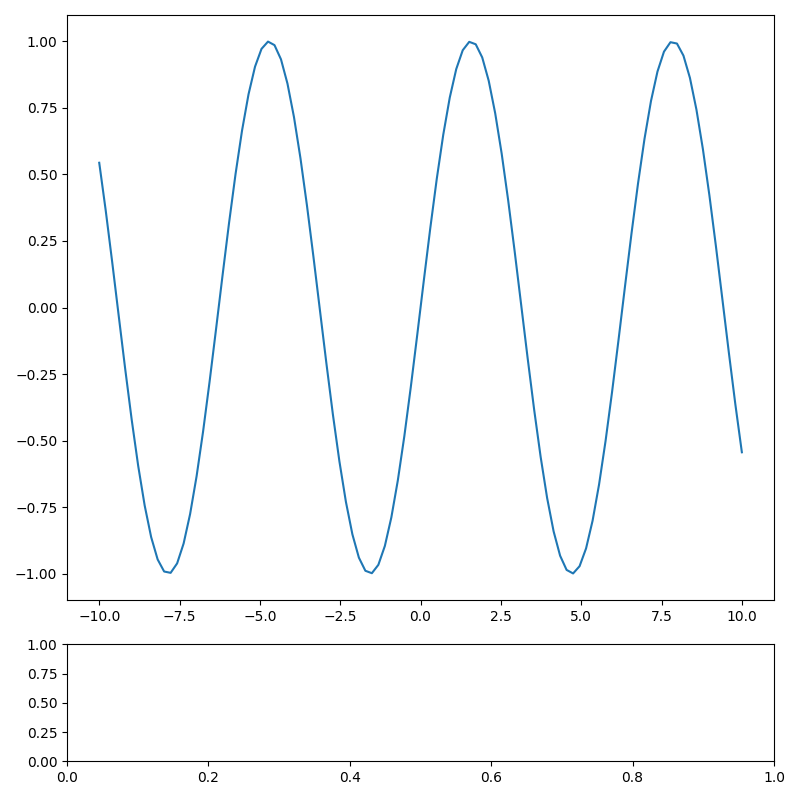

In [40]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True

locations = []
last_d = (0, 0)


#   0 print depth and data with time, markers on ascent_start, ascent_end, descent_end, 
#       print: T1 local time, Midnight or Noon or Quotidian
#       Options: <done> <unresolved> <critical> <previous> <continue this> 
#   1 from <continue this> above
#       print: max chlor, depth at max, surface chlor, depth at surface, binned depth count
#       click on max locations or 
#                <done> goes to next profile
#                <unresolved> <critical> goes to next profile
#                <+floor> goes to floor state 2
#   2 floor 
#       click on time/depth where floor signal is reached, up to two of these
#       print: depth of floor signal
#                <done> <unresolved> <critical> goes to next profile
#   3 from <+lens> above
#       click on groups of 3 points early-mid-late to get 3*n times/depths/values for this lens
#                <Add this lens> compiles average of all triples; opens a new lens
#                <Re-Do This Lens> clears data for this lens 
#                <Re-Do All Lenses> clears data for all lenses
#                <+note> goes to note state 3
#                <done> <unresolved> <critical> goes to next profile
#   4 from <+note> above
#       Write a note or indicate 'of interest' with a combination of ! and ? 
#               <done> <unresolved> <critical> goes to next profile
#
# Pandas dataframe has columns
#   status: ok, unresolved, critical
#   T0
#   T1
#   T2 
#   ascent duration: td64
#   descent duration: td64
#   profile type: midn, noon, quot
#   chlora max: value
#   chlora max depth: value
#   chlora surface: value
#   chlora surface depth: value
#   chlora floor: value
#   chlora floor depth: value
#   chlora n lenses: value
#   chlora lens 1 thickness: value (meters)
#   chlora lens 1 signal: value (max-min)
#   chlora lens 1 signal norm: value (signal / chlora max)
#   chlora lens 1 v1: value
#   chlora lens 1 d1: value (depth)
#   chlora lens 1 v2: value
#   chlora lens 1 d2: value (depth)
#   chlora lens 1 v3: value
#   chlora lens 1 d3: value (depth)
#   chlora lens 2 thickness: value (meters)
#   chlora lens 2 signal: value (max-min)
#   chlora lens 2 signal norm: value (signal / chlora max)
#   chlora lens 2 v1: value
#   chlora lens 2 d1: value (depth)
#   chlora lens 2 v2: value
#   chlora lens 2 d2: value (depth)
#   chlora lens 2 v3: value
#   chlora lens 2 d3: value (depth)
#   chlora lens 3 thickness: value (meters)
#   chlora lens 3 signal: value (max-min)
#   chlora lens 3 signal norm: value (signal / chlora max)
#   chlora lens 3 v1: value
#   chlora lens 3 d1: value (depth)
#   chlora lens 3 v2: value
#   chlora lens 3 d2: value (depth)
#   chlora lens 3 v3: value
#   chlora lens 3 d3: value (depth)
#   chlora lens 4 thickness: value (meters)
#   chlora lens 4 signal: value (max-min)
#   chlora lens 4 signal norm: value (signal / chlora max)
#   chlora lens 4 v1: value
#   chlora lens 4 d1: value (depth)
#   chlora lens 4 v2: value
#   chlora lens 4 d2: value (depth)
#   chlora lens 4 v3: value
#   chlora lens 4 d3: value (depth)
#   note: string
annotate_state = 0

def mouse_event(event):
    this_x, this_y = round(event.xdata, 2), round(event.ydata, 2)

    locations.append((this_x, this_y))
    # ax.plot(last_d[0], last_d[1], color='white')
    last_d = (this_x, this_y)
    
    axs[0].plot([last_d[0]], [last_d[1]], color='red', ms=12)
    
    msg = str(this_x) + '  ' + str(this_y)
    text_object = axs[1].text(0.0, .7, msg, color='k', fontsize=10)
    text_object.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='b'))
    fig.canvas.draw()


fig,axs = plt.subplots(2, figsize=(8,8), gridspec_kw={'height_ratios': [5,1]})
fig.canvas.mpl_connect('button_press_event', mouse_event)

x = np.linspace(-10, 10, 100)
y = np.sin(x)
axs[0].plot(x, y)
plt.show()

In [41]:
locations

[(-2.98, 0.63),
 (1.29, 0.12),
 (4.53, 0.29),
 (4.43, 0.66),
 (-0.92, 0.51),
 (-2.88, 0.14),
 (-1.36, -0.36),
 (2.97, -0.44),
 (7.05, -0.47),
 (8.7, -0.77),
 (0.47, 0.4),
 (0.67, 0.56),
 (0.42, 0.74),
 (0.21, 0.29),
 (0.05, 0.26),
 (0.05, 0.56),
 (0.41, 0.34)]

# Discarded code

#### Some line magic associated with IPython


```
%env
%matplotlib --list
%matplotlib
```


#### From a CSV file select two columns for a scatter chart.


```
%matplotlib inline

df = pd.read_csv('./tmp.csv')

# positions = []
# def onclick(event): positions.append(event.xdata, event.ydata)
    
fig,ax = plt.subplots()
ax.scatter(df['total_bill'], df['tip'])
ax.set(xlabel='Bill')
ax.set(ylabel='Tip')
# fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()
```


#### Figure size as a set parameter.


```
plt.rcParams["figure.figsize"] = [7.00, 3.50]
```


#### Using {} as a print argument placeholder, with .format. 

```
print('x: {} and y: {}'.format(this_x, this_y))
```

#### Loading an ndarray into numpy (first inflammation file from carpentries) for use with `imshow()`

```
import numpy, matplotlib
data = numpy.loadtxt(fname='./tmp1.csv', delimiter=',')
img = matplotlib.pyplot.imshow(data)
```

#### Below: Some vector drawing.

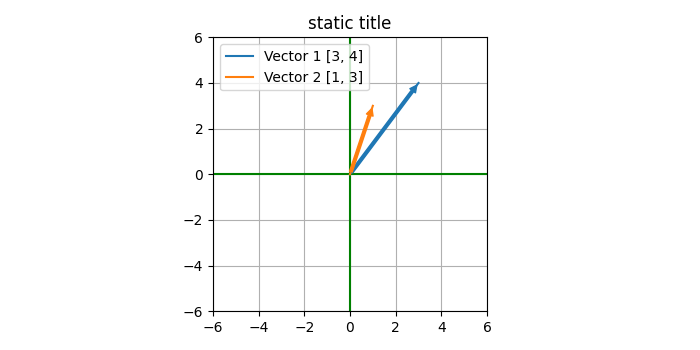

In [25]:
%matplotlib widget

import numpy as np
from math import acos, pi
import matplotlib.pyplot as plt
    
vector_1 = [3,4]
vector_2 = [1,3]

def get_label(which_vector, vector):
    """Labels a vector with its name and vector head coordinates"""
    return f"{which_vector} {vector}"

def plot_line(vector, label):    
    """Plots a vector in standard position"""
    line = plt.plot([0,vector[0]], [0, vector[1]], label=label)[0]
    
    # Draw as an arrow, as vectors are generally drawn    
    line.axes.annotate('',
        xytext=(0, 0),
        xy=(vector[0], vector[1]),       
        arrowprops=dict(color=line.get_color(), arrowstyle="simple"),
        size=10
    )

def configure_graph_grid():
    """Set up a square grid axis"""
    
    # Size
    grid_min = -6
    grid_max = 6
    
    # Make it square and set limits
    plt.axis('square')
    plt.axis(( grid_min, grid_max, grid_min, grid_max))
    
    # Plot x and y axes
    plt.plot([grid_min, grid_max], [0,0], 'g')
    plt.plot([0,0],[grid_min, grid_max], 'g')
    plt.grid()
    
# Display the grid and the vectors
figure = plt.figure()
configure_graph_grid()
line_1 = plot_line(vector_1, get_label("Vector 1", vector_1))
line_2 = plot_line(vector_2, get_label("Vector 2", vector_2))
plt.legend()
plt.title('static title')
plt.show()

## More discards


#### using the return value from the event binding

```
cid = fig.canvas.mpl_connect('button_press_event', mouse_event)

```

#### more matplotlib show what ya got

```
    # fig.canvas.flush_events()
    # plt.show()
```